### Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions 
Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
- Get all the Earth meteorites that fell before the year 2000
- Get all the earth meteorites co-ordinates who fell before the year 1970
- Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# reading data using pandas read_csv method

df = pd.read_csv("https://raw.githubusercontent.com/medashabari/Placement_Assignment_Meda_shabarish/Main/dataset/nasa_data.csv")

In [4]:
## top 5 rows
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50...."
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56..."
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216..."
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88..."
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33...."


### Get all the Earth meteorites that fell before the year 2000

In [26]:
df['year_col']=pd.to_datetime(df['year'],errors = 'coerce').dt.year

In [30]:
df[(df['year_col'] < 2000) & (df['fall']=='Fell')]['name']

0         Aachen
1         Aarhus
2           Abee
3       Acapulco
4        Achiras
         ...    
994     Timochin
995     Tirupati
997        Tjabe
998     Tjerebon
999    Tomakovka
Name: name, Length: 912, dtype: object

In [44]:
df['year_cut']=pd.cut(df.year_col,bins=[1600,1700,1800,1900,2000,2100])

In [45]:
df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,year_col,year_cut
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50....",1880.0,"(1800, 1900]"
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56...",1951.0,"(1900, 2000]"
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216...",1952.0,"(1900, 2000]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",1976.0,"(1900, 2000]"
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33....",1902.0,"(1900, 2000]"
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,230.0,Fell,1934-01-01T00:00:00.000,13.63333,79.41667,"{'type': 'Point', 'coordinates': [79.41667, 13...",1934.0,"(1900, 2000]"
996,Tissint,54823,Valid,Martian (shergottite),7000.0,Fell,2011-01-01T00:00:00.000,29.48195,-7.61123,"{'type': 'Point', 'coordinates': [-7.61123, 29...",2011.0,"(2000, 2100]"
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01T00:00:00.000,-7.08333,111.53333,"{'type': 'Point', 'coordinates': [111.53333, -...",1869.0,"(1800, 1900]"
998,Tjerebon,24012,Valid,L5,16500.0,Fell,1922-01-01T00:00:00.000,-6.66667,106.58333,"{'type': 'Point', 'coordinates': [106.58333, -...",1922.0,"(1900, 2000]"


<AxesSubplot:>

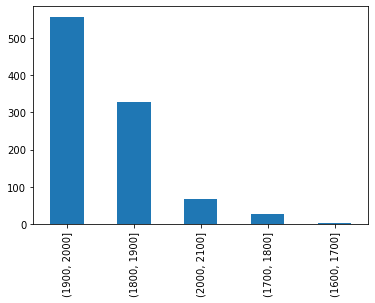

In [47]:
df['year_cut'].value_counts().plot(kind='bar')

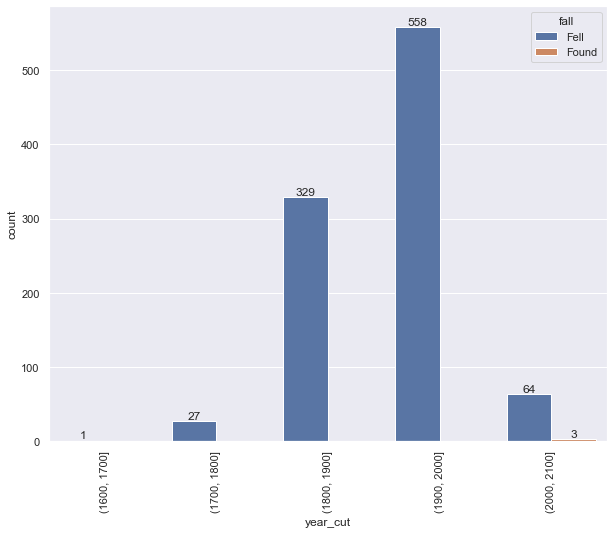

In [52]:
sns.set(rc={'figure.figsize':(10,8)})
ax=sns.countplot(x='year_cut',hue='fall',data=df)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

### Get all the earth meteorites co-ordinates who fell before the year 1970

In [85]:
import ast
df[df['year_col'] < 1970]['geolocation'].dropna().apply(lambda x : ast.literal_eval(x)['coordinates'])

0          [6.08333, 50.775]
1       [10.23333, 56.18333]
2           [-113, 54.21667]
4        [-64.95, -33.16667]
5               [71.8, 32.1]
               ...          
994             [35.2, 54.5]
995     [79.41667, 13.63333]
997    [111.53333, -7.08333]
998    [106.58333, -6.66667]
999        [34.76667, 47.85]
Name: geolocation, Length: 757, dtype: object

### Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

In [88]:
df[df['mass']>10000]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,year_col,year_cut
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216...",1952.0,"(1900, 2000]"
7,Agen,392,Valid,H5,30000.0,Fell,1814-01-01T00:00:00.000,44.21667,0.61667,"{'type': 'Point', 'coordinates': [0.61667, 44....",1814.0,"(1800, 1900]"
11,Aïr,424,Valid,L6,24000.0,Fell,1925-01-01T00:00:00.000,19.08333,8.38333,"{'type': 'Point', 'coordinates': [8.38333, 19....",1925.0,"(1900, 2000]"
16,Akyumak,433,Valid,"Iron, IVA",50000.0,Fell,1981-01-01T00:00:00.000,39.91667,42.81667,"{'type': 'Point', 'coordinates': [42.81667, 39...",1981.0,"(1900, 2000]"
27,Alfianello,466,Valid,L6,228000.0,Fell,1883-01-01T00:00:00.000,45.26667,10.15000,"{'type': 'Point', 'coordinates': [10.15, 45.26...",1883.0,"(1800, 1900]"
...,...,...,...,...,...,...,...,...,...,...,...,...
991,Tieschitz,23989,Valid,H/L3.6,28000.0,Fell,1878-01-01T00:00:00.000,49.60000,17.11667,"{'type': 'Point', 'coordinates': [17.11667, 49...",1878.0,"(1800, 1900]"
992,Tilden,23998,Valid,L6,74800.0,Fell,1927-01-01T00:00:00.000,38.20000,-89.68333,"{'type': 'Point', 'coordinates': [-89.68333, 3...",1927.0,"(1900, 2000]"
994,Timochin,24004,Valid,H5,65500.0,Fell,1807-01-01T00:00:00.000,54.50000,35.20000,"{'type': 'Point', 'coordinates': [35.2, 54.5]}",1807.0,"(1800, 1900]"
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01T00:00:00.000,-7.08333,111.53333,"{'type': 'Point', 'coordinates': [111.53333, -...",1869.0,"(1800, 1900]"
